In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torch.autograd import Variable

In [2]:
torch.manual_seed(1)

In [3]:
train_data = torchvision.datasets.MNIST(root = "./data", #preprocess the MNIST dataset
                                       train = True,
                                       download = True,
                                       transform = transforms.ToTensor()
                                      )

test_data = torchvision.datasets.MNIST(root = "./data",
                                      train = False,
                                      transform = transforms.ToTensor()
                                     )
print("test data size is: ", len(train_data), "\nTrain Data size is: ",len(test_data))

test data size is:  60000 
Train Data size is:  10000


In [4]:
randomLabel = torch.tensor(np.random.randint(0, 10, (len(train_data)),)) #Label randomizer
train_data.targets = randomLabel

In [5]:
train_loader = torch.utils.data.DataLoader(dataset=train_data, 
                                           batch_size=200, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_data, 
                                          batch_size=200, 
                                          shuffle=False)

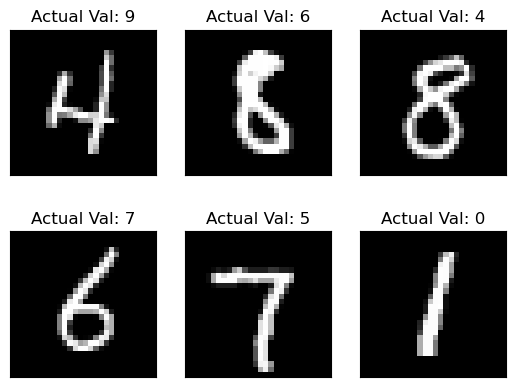

In [6]:
examples = iter(train_loader)
example_data, example_targets = next(examples)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title("Actual Val: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [7]:
class CNN1(nn.Module):
    def __init__(self,):
        super(CNN1, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 10)


    def forward(self, x):

        x = x.view(x.size()[0], -1) #Flattening to one dimension
        x = F.relu(self.fc1(x)) #Fully Connected NN  
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [8]:
def trainFunc(model, optimizer, epoch, train_loader, interval):
    model.train()
    loss_fn = torch.nn.CrossEntropyLoss()
    n_correct = 0
    n_samples = 0
    for i, (data, target) in enumerate(train_loader):
        
        #if (i+1)%interval == 0 : print(i+1)  
        data, target = Variable(data), Variable(target)
        
        optimizer.zero_grad()

        # Forward propagation
        prediction = model(data)
        loss = loss_fn(prediction, target)
        
        #Backward propagation
        loss.backward()
        
        optimizer.step()

        _, predicted = torch.max(prediction.data, 1)
        n_samples += target.size(0)
        n_correct += (predicted == target).sum().item()
        acc = 100.0 * n_correct / n_samples
        
        
        if i % interval == 0:
            print (f'Train Log:Epoch: {epoch}, Step [{i+1}/{len(train_loader.dataset)}], TrainLoss: {loss.item():.4f}')
    return loss.data, round(acc,2)

In [9]:
def testFunc(model, epoch, test_loader):
    test_load = test_loader
    model.eval()
    n_correct = 0
    n_samples = 0
    testLoss = 0
    count = 0
    
    with torch.no_grad():
        for images, labels in test_load:
            images, labels = Variable(images),Variable(labels)
    
            prediction = model(images)
            testLoss += loss_func(prediction,labels).item()
           
            _,predicted = torch.max(prediction.data, 1)
            n_samples += labels.size(0)
            count += 1
            n_correct += (predicted == labels).sum().item()
    
        Test_loss = testLoss/count
        netTest_acc1 = 100.0 * n_correct / n_samples
        print(f'Accuracy of the network on the test images: {netTest_acc1}% & Test Loss: {Test_loss}')
    return netTest_acc1, Test_loss

Total no of parameters in Model 1: 335114
Train Log:Epoch: 1, Step [1/60000], TrainLoss: 2.3038
Accuracy of the network on the test images: 14.22% & Test Loss: 2.3033706092834474
Train Log:Epoch: 2, Step [1/60000], TrainLoss: 2.3044
Accuracy of the network on the test images: 10.93% & Test Loss: 2.3041229677200317
Train Log:Epoch: 3, Step [1/60000], TrainLoss: 2.3038
Accuracy of the network on the test images: 10.83% & Test Loss: 2.3084879112243653
Train Log:Epoch: 4, Step [1/60000], TrainLoss: 2.2938
Accuracy of the network on the test images: 8.44% & Test Loss: 2.3095192241668703
Train Log:Epoch: 5, Step [1/60000], TrainLoss: 2.2973
Accuracy of the network on the test images: 11.2% & Test Loss: 2.3127228355407716
Train Log:Epoch: 6, Step [1/60000], TrainLoss: 2.2937
Accuracy of the network on the test images: 11.64% & Test Loss: 2.3171262884140016
Train Log:Epoch: 7, Step [1/60000], TrainLoss: 2.2886
Accuracy of the network on the test images: 12.26% & Test Loss: 2.3215161848068235
T

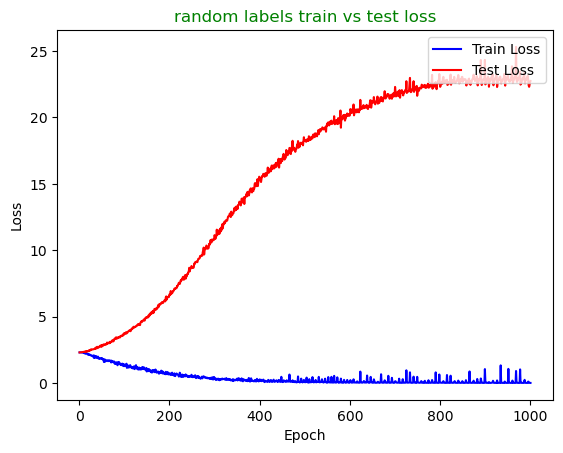

In [10]:
cnn1 = CNN1()
cnn1 = cnn1
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn1.parameters(), lr=0.0001)

a=[]
for i in cnn1.parameters():
    a.append(torch.numel(i))
print('Total no of parameters in Model 1:', np.sum(a))

train_loss_arr = []
test_loss_arr = []
epochArr = []

epochs = 1000
interval = 500
for epoch in range(1, epochs + 1):
    epochArr.append(epoch)
    loss, acc = trainFunc(cnn1, optimizer, epoch, train_loader, interval)
    train_loss_arr.append(loss.detach().numpy())
    testAcc,testloss = testFunc(cnn1, epoch, test_loader)
    test_loss_arr.append(testloss)

    
#Plotting Train Vs Test Loss

plt.plot(epochArr,train_loss_arr,color="Blue")
plt.plot(epochArr,test_loss_arr,color="red")
plt.legend(['Train Loss','Test Loss'],loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("random labels train vs test loss",color = "green")

plt.show()